In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
print(iris.shape)

(150, 5)


In [4]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
n = len(iris[iris['species'] == 'versicolor'])
print("length of Versicolor:",n)

length of Versicolor: 50


In [11]:
n2 = len(iris[iris['species'] == 'setosa'])
print("length of Setosa:",n2)

length of Setosa: 50


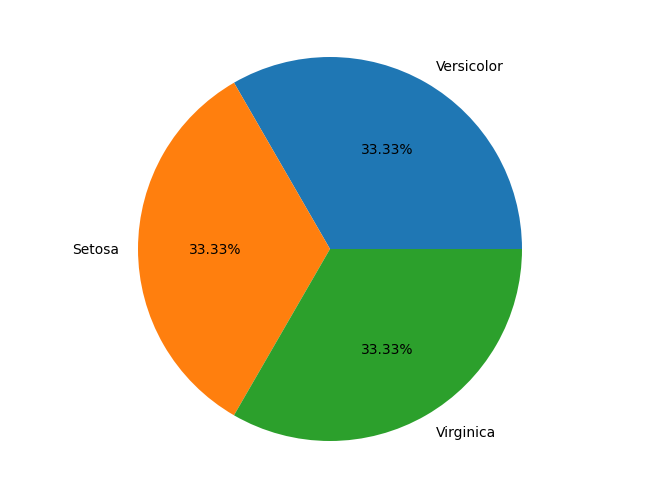

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

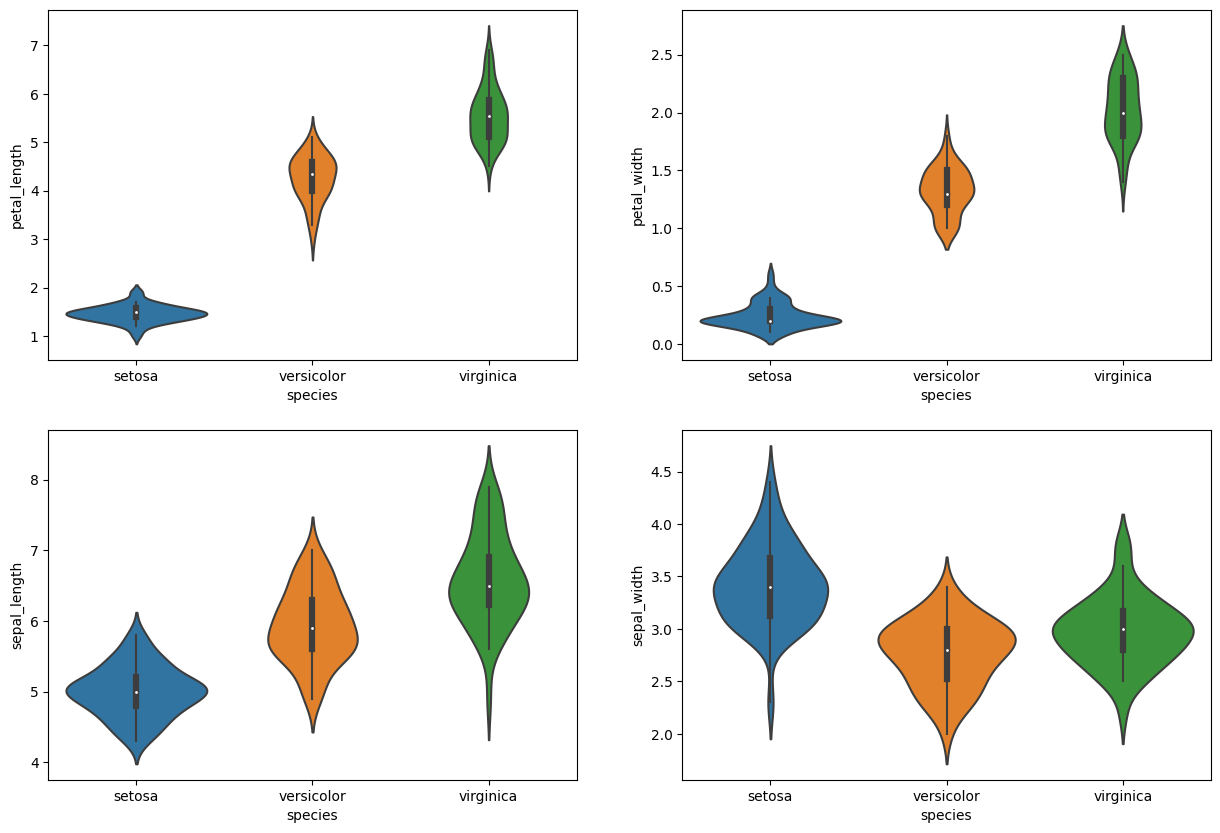

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

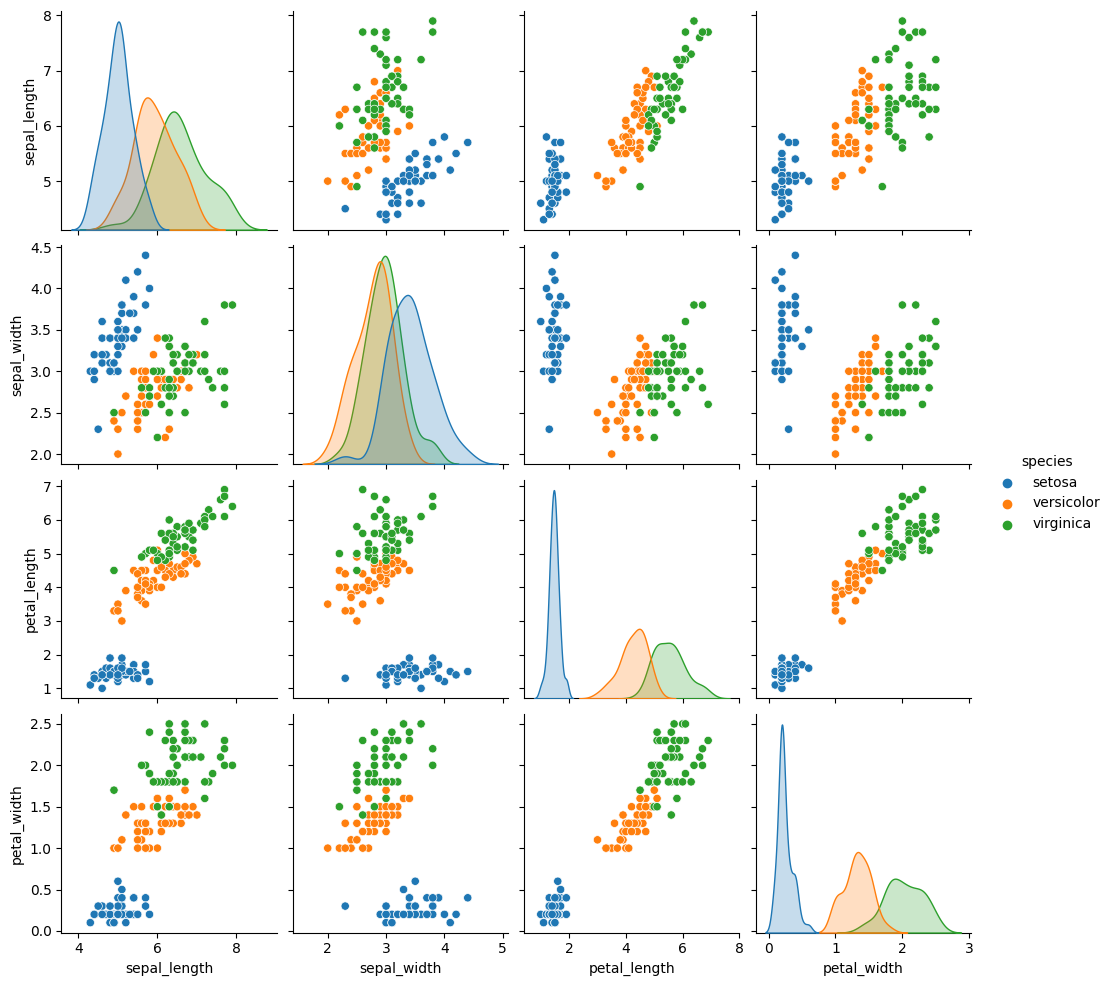

In [13]:
sns.pairplot(iris,hue='species');

In [16]:
x_data = iris['sepal_length'].values.reshape(-1,1)
y_data = iris['sepal_width'].values.reshape(-1,1)

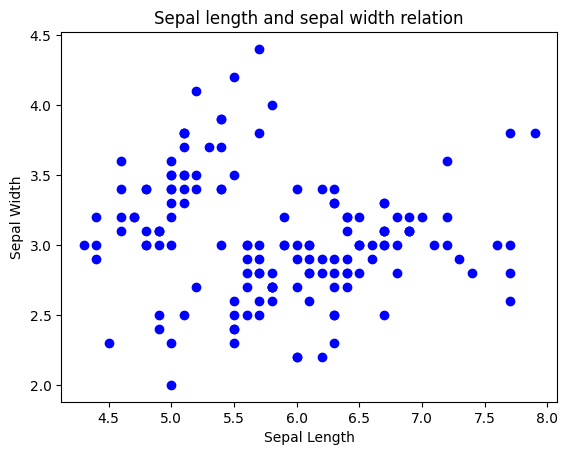

In [17]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(x_data,y_data,color='b')
plt.title("Sepal length and sepal width relation")
plt.show()

<Axes: >

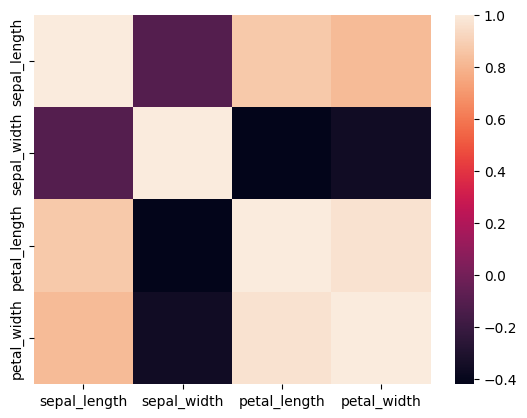

In [18]:
sns.heatmap(iris.corr())

In [20]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [21]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = test.species

In [22]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
136,6.3,3.4,5.6,2.4
78,6.0,2.9,4.5,1.5
49,5.0,3.3,1.4,0.2
146,6.3,2.5,5.0,1.9
64,5.6,2.9,3.6,1.3


In [23]:
test_y.head()

12         setosa
88     versicolor
107     virginica
108     virginica
76     versicolor
Name: species, dtype: object

In [26]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
confusion_mat


array([[19,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  8]])

In [28]:
classification_report(test_y,prediction)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       0.82      1.00      0.90         9\n   virginica       1.00      0.80      0.89        10\n\n    accuracy                           0.95        38\n   macro avg       0.94      0.93      0.93        38\nweighted avg       0.96      0.95      0.95        38\n'

In [29]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.80      0.89        10

    accuracy                           0.95        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.96      0.95      0.95        38



In [24]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',random_state=7)
DT.fit(train_X,train_y)
y_pred_DT = DT.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred_DT))

Accuracy Score: 0.9736842105263158


In [30]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.80      0.89        10

    accuracy                           0.95        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.96      0.95      0.95        38



In [31]:
confusion_matrix(test_y,y_pred_DT)

array([[19,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])